In [172]:
import plotly 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

water_df = pd.read_csv("water_usage.csv")
industry_df = pd.read_csv("industry_occupation.csv", encoding = "latin1")
education_df = pd.read_csv("education_attainment.csv", encoding = "latin1")
earnings_df = pd.read_csv("earnings.csv", encoding = "latin1")
chemicals_df = pd.read_csv("chemicals.csv", encoding = "latin1")
droughts_df = pd.read_csv("droughts.csv", encoding = "latin1")



In [173]:
chemicals_df.describe()

,pop_served,value,year,fips,state_fips
count,8.823190e+05,882319.000000,882319.000000,882319.000000,882319.000000
mean,1.073180e+04,7.434686,2008.854905,30189.924510,30.127847
std,9.520064e+04,23.677866,4.727939,15063.281913,15.069085
min,0.000000e+00,0.000000,1999.000000,6001.000000,6.000000
25%,1.180000e+02,0.300000,2005.000000,19109.000000,19.000000
50%,4.850000e+02,1.000000,2009.000000,33005.000000,33.000000
75%,3.030000e+03,4.600000,2013.000000,42027.000000,42.000000
max,8.271000e+06,4527.000000,2016.000000,55141.000000,55.000000


In [174]:
'''
converting micrograms to milligrams
'''
part_micro = chemicals_df[chemicals_df['unit_measurement'] == 'micrograms/L']
part_micro['value'] = part_micro['value']/1000
part_milli = chemicals_df[chemicals_df['unit_measurement'] == 'milligrams/L']
df = pd.concat([part_micro,part_milli])
chemicals_df = df


c:\users\purvak\anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



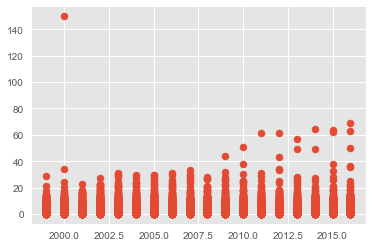

In [175]:

df_chemicals_corr = chemicals_df[['value','year']]
ans = []
for i in range(1999,2017):
    temp = df_chemicals_corr[df_chemicals_corr['year'] == i]
    temp = temp['value']
    x = temp.values.sum()
    ans.append(x)

plt.scatter(chemicals_df['year'],chemicals_df['value'])
plt.show()

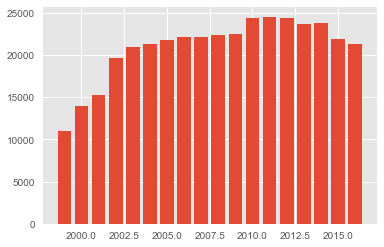

In [176]:
n = np.array([1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016])
plt.bar(n,ans)
plt.show()

In [177]:
chemicals_df[['chemical_species','value','county','state']].head()

,chemical_species,value,county,state
0,Uranium,0.00154,Alameda,California
1,Uranium,0.00164,Alameda,California
2,Uranium,0.00164,Alameda,California
3,Uranium,0.00164,Alameda,California
4,Uranium,0.00451,Alameda,California


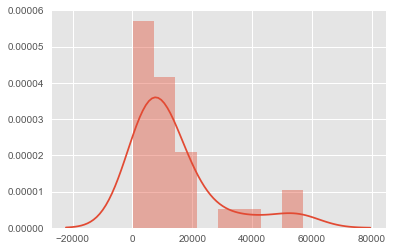

In [178]:
'''
Understanding state with largest contamination by value
'''

states =chemicals_df['state'].unique()
ans2 = []
c =chemicals_df[['value','state']]
d = {}
for s in states:
    temp = c[c['state'] == s]
    temp = temp['value']
    x = temp.values.sum()
    ans2.append((s,x))
    d[s]=x

def takeSecond(elem):
    return elem[1]

# sort list with key
sortedList = sorted(ans2, key=takeSecond, reverse=True)
#print(sortedList)

k = []
v =[]

for key,values in d.items():
    k.append(key)
    v.append(values)
#x=pd.DataFrame(data = d)
#x
#print(k)
#print(v)

sns.distplot(np.array(v))
#plt.bar(k,v)
#plt.plot()

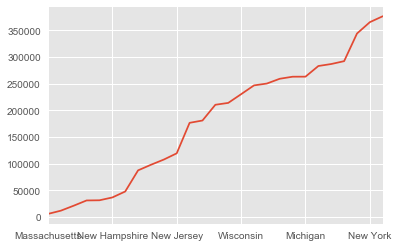

In [179]:
ts = pd.Series(v, index=k)
ts = ts.cumsum()
ts.plot()

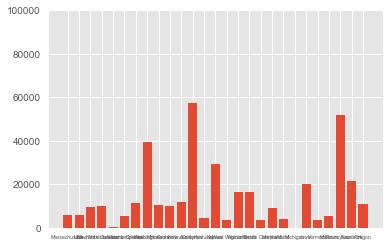

In [180]:
import pylab as plt
blank = []
for i in range(len(k)):
    blank.append(i)
plt.bar(blank,v, align = 'center')
plt.xticks(blank,k, fontsize = 5)
plt.ylim([0,100000])
plt.show()


In [181]:
ls = chemicals_df['chemical_species'].unique()
ans_ = []
for chem in ls:
    tem = chemicals_df[chemicals_df['chemical_species'] == chem]
    tem = tem['value']
    x = tem.values.sum()
    ans_.append((chem,x))
#print(ans_)
sortedList2 = sorted(ans_, key=takeSecond, reverse=True)
print(sortedList2)

[('Nitrates', 370176.22000000003), ('Trihalomethane', 3611.21774), ('Halo-Acetic Acid', 1912.10925), ('Arsenic', 403.51652999999999), ('Uranium', 203.07840999999999), ('DEHP', 59.666240000000002)]


In [182]:
chemicals_df['unit_measurement'].unique()

array(['micrograms/L', 'milligrams/L'], dtype=object)

In [183]:
f=chemicals_df['state'].unique()
c =chemicals_df[['value','state']]
a = []
for s in f:
    temp = c[c['state'] == s]
    temp = temp['value']
    x = temp.values.sum()
    a.append((s,x))
#print(a)
sortedList3 = sorted(a, key=takeSecond, reverse=True)
print(sortedList3)

[('California', 57152.110449999993), ('Pennsylvania', 51801.64748), ('Washington', 39634.056109999998), ('Kansas', 29502.440140000002), ('New York', 21319.858359999998), ('Iowa', 19964.776010000001), ('Florida', 16498.458640000001), ('Wisconsin', 16310.204), ('New Jersey', 11665.53865), ('Colorado', 11173.21276), ('Oregon', 11067.203509999999), ('Minnesota', 10457.783939999999), ('North Carolina', 9839.9411099999998), ('Connecticut', 9784.2725900000005), ('New Mexico', 9338.3296300000002), ('Maryland', 8960.2449099999994), ('Utah', 6065.45298), ('Massachusetts', 5878.1419700000015), ('Missouri', 5346.40056), ('New Hampshire', 5295.1376799999998), ('Kentucky', 4349.0467099999996), ('Maine', 3856.8906000000002), ('Vermont', 3731.2917699999998), ('West Virginia', 3495.9003299999999), ('South Carolina', 3472.93334), ('Louisiana', 312.54354999999998), ('Michigan', 91.990389999999991)]


In [184]:
chemical_df =chemicals_df
chemical_df_upt =chemical_df.replace('Less than or equal MCL',1)
chemical_df_upt =chemical_df_upt.replace('Non Detect',0)
chemical_df_upt =chemical_df_upt.replace('Greater than MCL',2)

In [185]:
ans_2 = []
for chem in ls:
    tem = chemical_df_upt[chemical_df_upt['chemical_species'] == chem]
    tem = tem['contaminant_level']
    x = tem.values.sum()
    ans_2.append((chem,x))
print(ans_2)


[('Uranium', 24478), ('Arsenic', 48785), ('DEHP', 5278), ('Halo-Acetic Acid', 104967), ('Trihalomethane', 135100), ('Nitrates', 212436)]


In [186]:
a1 = []
for s in f:
    temp = chemical_df_upt[chemical_df_upt['state'] == s]
    temp = temp['contaminant_level']
    x = temp.values.sum()
    a1.append((s,x))
#print(a1)
sortedList4 = sorted(a1,key=takeSecond, reverse=True)
sortedList4

[('Pennsylvania', 49083),
 ('Florida', 48433),
 ('California', 41943),
 ('New York', 39128),
 ('Washington', 37943),
 ('Kansas', 23496),
 ('Colorado', 23111),
 ('Missouri', 22616),
 ('Minnesota', 21345),
 ('Iowa', 20039),
 ('Wisconsin', 19327),
 ('New Jersey', 18674),
 ('New Mexico', 15708),
 ('Oregon', 15467),
 ('Connecticut', 13482),
 ('Louisiana', 13336),
 ('West Virginia', 12929),
 ('Massachusetts', 12286),
 ('Utah', 11510),
 ('North Carolina', 11142),
 ('Kentucky', 10957),
 ('New Hampshire', 9699),
 ('Maryland', 9401),
 ('South Carolina', 8918),
 ('Vermont', 8429),
 ('Maine', 8230),
 ('Michigan', 4412)]

In [189]:
#population in california

pop = 0
temp = water_df[water_df['state'] == 'CA']
temp = temp['population']
pop = temp.values.sum()


In [199]:
d = {'chemical':['Uranium', 'Uranium','Uranium','Uranium', 'Uranium','Uranium','Arsenic','Arsenic','Arsenic','Arsenic','Arsenic',
                 'Arsenic','DEHP(micrograms/L)','DEHP(micrograms/L)','DEHP(micrograms/L)','DEHP(micrograms/L)',
                'DEHP(micrograms/L)','DEHP(micrograms/L)','Nitrates(milligrams/L)','Nitrates(milligrams/L)','Nitrates(milligrams/L)',
                'Nitrates(milligrams/L)','Nitrates(milligrams/L)','Nitrates(milligrams/L)','Halo-Acetic Acid(micrograms/L)','Halo-Acetic Acid(micrograms/L)',
                 'Halo-Acetic Acid(micrograms/L)','Halo-Acetic Acid(micrograms/L)','Halo-Acetic Acid(micrograms/L)','Halo-Acetic Acid(micrograms/L)',
                 'Trihalomethane(micrograms/L)','Trihalomethane(micrograms/L)','Trihalomethane(micrograms/L)','Trihalomethane(micrograms/L)',
                'Trihalomethane(micrograms/L)','Trihalomethane(micrograms/L)'],
     'coefficients':[-0.00584229,  0.72542275,  0.08034749,  0.02117824, -0.03213056,
      -0.04028493,-0.00584229,  0.72542275,  0.08034749,  0.02117824, -0.03213056,
      -0.04028493,-0.00584229,  0.72542275,  0.08034749,  0.02117824, -0.03213056,
      -0.04028493,-0.00584229,  0.72542275,  0.08034749,  0.02117824, -0.03213056,
      -0.04028493,-0.00584229,  0.72542275,  0.08034749,  0.02117824, -0.03213056,
      -0.04028493,-0.00584229,  0.72542275,  0.08034749,  0.02117824, -0.03213056,
      -0.04028493]}
                 
                 

In [200]:
df = pd.DataFrame(d)

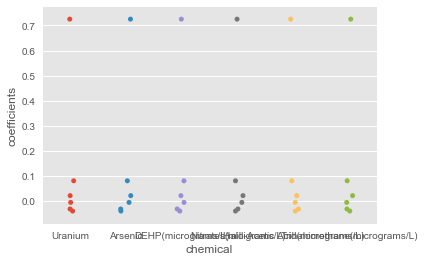

In [201]:
sns.stripplot(x="chemical", y="coefficients", data=df, jitter=True)


In [195]:
#x = industry_df[industry_df['year']==2010]
#print(x['county'].unique())


cal_count = ['Alameda County, California', 'Butte County, California',
       'Contra Costa County, California', 'El Dorado County, California',
       'Fresno County, California', 'Humboldt County, California',
       'Imperial County, California', 'Kern County, California',
       'Kings County, California', 'Lake County, California',
       'Los Angeles County, California', 'Madera County, California',
       'Marin County, California', 'Mendocino County, California',
       'Merced County, California', 'Monterey County, California',
       'Napa County, California', 'Nevada County, California',
       'Orange County, California', 'Placer County, California',
       'Riverside County, California', 'Sacramento County, California','San Bernardino County, California',
 'San Diego County, California', 'San Francisco County, California',
 'San Joaquin County, California' ,'San Luis Obispo County, California',
 'San Mateo County, California' ,'Santa Barbara County, California',
 'Santa Clara County, California', 'Santa Cruz County, California',
 'Shasta County, California', 'Solano County, California',
 'Sonoma County, California', 'Stanislaus County, California',
 'Sutter County, California', 'Tulare County, California',
 'Ventura County, California', 'Yolo County, California',
 'Yuba County, California']

occ = ['agriculture', 'construction' , 'manufacturing' , 'wholesale_trade',  'retail_trade','transport_utilities', ' information', ' finance_insurance_realestate']
df = pd.DataFrame()
ans = []
for county in cal_count:
    temp = industry_df[industry_df['county']== county]
    ans.append(temp)
    
df = pd.concat(ans)



,geo_id,fips,county,total_employed,agriculture,construction,manufacturing,wholesale_trade,retail_trade,transport_utilities,information,finance_insurance_realestate,prof_scientific_waste,edu_health,arts_recreation,other,public_admin,year
45,0500000US06001,6001,"Alameda County, California",699389.0,1936.0,36459.0,74342.0,23531.0,71978.0,37659.0,21330.0,40478.0,113728.0,157244.0,56708.0,35947.0,28049.0,2010
852,0500000US06001,6001,"Alameda County, California",723858.0,2772.0,35871.0,83672.0,18509.0,71929.0,39524.0,21455.0,45204.0,111334.0,162364.0,68460.0,37458.0,25306.0,2011
1663,0500000US06001,6001,"Alameda County, California",747170.0,2646.0,36176.0,80987.0,21664.0,74141.0,32068.0,22626.0,45107.0,126063.0,170045.0,71294.0,38390.0,25963.0,2012
2477,0500000US06001,6001,"Alameda County, California",766651.0,3044.0,43935.0,78470.0,20850.0,80081.0,37923.0,22424.0,47494.0,131794.0,172876.0,64363.0,36613.0,26784.0,2013
3294,0500000US06001,6001,"Alameda County, California",802511.0,4525.0,39763.0,78934.0,21468.0,75990.0,38439.0,26613.0,49106.0,139503.0,178747.0,76076.0,44163.0,29184.0,2014
4111,0500000US06001,6001,"Alameda County, California",836462.0,3366.0,45288.0,80754.0,22451.0,73840.0,46887.0,29816.0,50013.0,156367.0,179168.0,73407.0,44993.0,30112.0,2015
4930,0500000US06001,6001,"Alameda County, California",848374.0,2289.0,46400.0,80512.0,20774.0,77072.0,43591.0,30037.0,50749.0,169056.0,179720.0,76790.0,43447.0,27937.0,2016
46,0500000US06007,6007,"Butte County, California",88041.0,2925.0,4578.0,5389.0,2197.0,12104.0,3661.0,1695.0,4209.0,10004.0,24315.0,8733.0,4482.0,3749.0,2010
853,0500000US06007,6007,"Butte County, California",84351.0,2453.0,5208.0,4419.0,1644.0,11772.0,2294.0,1648.0,3344.0,8901.0,25275.0,8875.0,4504.0,4014.0,2011
1664,0500000US06007,6007,"Butte County, California",86165.0,2720.0,4338.0,5065.0,1606.0,12904.0,2386.0,1357.0,4251.0,8100.0,24616.0,9889.0,5620.0,3313.0,2012
